<a href="https://colab.research.google.com/github/Zhangz5534/CS491/blob/main/Top2VecPart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
my_path="/content/drive/MyDrive/CS491/Data/"

# Load dataset from Hugging Face 🤗

In [4]:
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00


In [5]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("DIBT/10k_prompts_ranked")

docs = dataset['train']['prompt']

##get a summary of dataset
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/10331 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['prompt', 'quality', 'metadata', 'avg_rating', 'num_responses', 'agreement_ratio', 'raw_responses', 'kind', 'cluster_description', 'topic'],
        num_rows: 10331
    })
})

In [6]:
import random
print(f'number of prompts in dataset: {len(docs)}\n')
r=random.randint(0, len(docs)-1)
print(f'A random entry:\n {docs[r]}')

number of prompts in dataset: 10331

A random entry:
 Develop a board game that highlights the benefits of community service and volunteerism for students.


# Train Top2Vec model. Also save and load.

In [7]:
!pip install top2vec -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 42.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.3 MB/s eta 0:00:00


If you have arleady trained a model and saved it, then you can load it with the following prompt and skip the training.

❌
 **Of course the first time through you should skip the next command!**

In [ ]:
# Load model
import pickle

with open(my_path+'prompt_deep_model.pkl', 'rb') as f:
    model = pickle.load(f)

The next cell is the work horse, where the model is trained. ⛽: ⏰ It might take some time, so be patient.

In [8]:
##If model is already trained and saved (see section below) then this can be skipped!!
from top2vec import Top2Vec

# Assuming 'docs' is a list of text documents you wish to model
model = Top2Vec(docs, embedding_model='doc2vec', speed='deep-learn')
#fast-learn, learn, deep-learn


2024-03-31 18:41:06,255 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-31 18:41:09,177 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-31 18:58:31,236 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-31 18:59:11,158 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-31 18:59:11,844 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


After waiting for the model to be trained, you might consider saving it so that next time you don't have to retrain if you come back to this later! 👍 This is what the next cell does.

In [9]:
import pickle

# Save model
with open(my_path+'prompt_deep_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Proceed with topic analysis after retrieving model

In [10]:
model.get_num_topics()

123

In [11]:
model.get_topic_sizes()

(array([658, 342, 188, 182, 181, 139, 139, 131, 131, 128, 123, 115, 115,
        112, 106, 103, 103, 102, 102, 101, 100,  98,  97,  97,  96,  96,
         90,  90,  90,  89,  89,  89,  87,  87,  87,  86,  86,  85,  85,
         84,  81,  81,  81,  79,  79,  79,  79,  79,  78,  78,  77,  77,
         77,  77,  76,  76,  75,  74,  74,  73,  73,  73,  71,  71,  70,
         70,  70,  70,  69,  69,  69,  69,  68,  68,  68,  68,  68,  67,
         67,  66,  65,  65,  64,  64,  64,  63,  63,  63,  62,  62,  61,
         61,  61,  60,  59,  58,  58,  57,  57,  57,  57,  57,  56,  56,
         56,  56,  55,  54,  52,  51,  51,  49,  48,  46,  45,  39,  37,
         36,  35,  33,  32,  32,  31]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52

**Question: What do the integers in the first array mean**: ⭕

---



Your Answer:
🙂

The number of documents or data points associated with that particular topic



In [12]:
model.topic_words[0:3]

array([['snippet', 'returns', 'task', 'input', 'signature', 'code',
        'function', 'directory', 'implement', 'strings', 'assume',
        'output', 'integers', 'arguments', 'method', 'missing', 'dict',
        'variable', 'takes', 'str', 'dictionary', 'represents',
        'integer', 'defined', 'string', 'parameters', 'boolean', 'nums',
        'checks', 'representing', 'containing', 'indicating', 'list',
        'specified', 'tuple', 'numbers', 'note', 'otherwise',
        'parameter', 'object', 'implements', 'pointer', 'specifications',
        'complete', 'performs', 'dataframe', 'defines', 'valid',
        'implementation', 'module'],
       ['implications', 'potential', 'ethical', 'impact',
        'environmental', 'examine', 'analysis', 'effectiveness',
        'research', 'individuals', 'factors', 'strategies', 'climate',
        'provide', 'additionally', 'explore', 'challenges', 'findings',
        'consider', 'assess', 'discuss', 'cultural', 'opportunities',
        'eff

# Documents similar to keywords

##Pick some keywords that look interesting in the top 3-4 topics:

*   model.topic_words[0]
*   model.topic_words[1]
*   model.topic_words[2]
*   etc.

In [13]:
# Assuming 'model' is your trained Top2Vec model and 'keywords' is a list of keywords.
keywords = ["function","integer"]
documents, document_score, document_ids = model.search_documents_by_keywords(keywords=keywords, num_docs=5)

# This will return the top most similar documents to the provided keywords,
# their similarity scores, and their IDs within the model.


In [14]:
# Print the results
for i in range(len(documents)):
    print(f"Document ID: {document_ids[i]}")
    print(f"Similarity Score: {document_score[i]}")
    print(f"Document Content: {documents[i][:200]}...")  # Print the first 200 characters to get an idea of the document content
    print("---")

Document ID: 1398
Similarity Score: 0.3024178445339203
Document Content: You are given a code snippet that calculates a percentage based on a given 2D array and a tolerance value. Your task is to write a function that completes the code snippet by implementing the missing ...
---
Document ID: 5253
Similarity Score: 0.28327739238739014
Document Content: You are given a code snippet that involves converting the coordinates of a 3D vector (`fv`) from floating-point (`float32`) to unsigned 32-bit integers (`uint32`). Your task is to write a function tha...
---
Document ID: 6544
Similarity Score: 0.277363657951355
Document Content: You are given a code snippet that contains a function and some test cases. Your task is to understand the purpose of the code and complete the missing part within the `assert_eq!()` macro.

The code s...
---
Document ID: 4465
Similarity Score: 0.2769619822502136
Document Content: You are given a code snippet that includes a function. Your task is to analyze the f

# Topic modeling

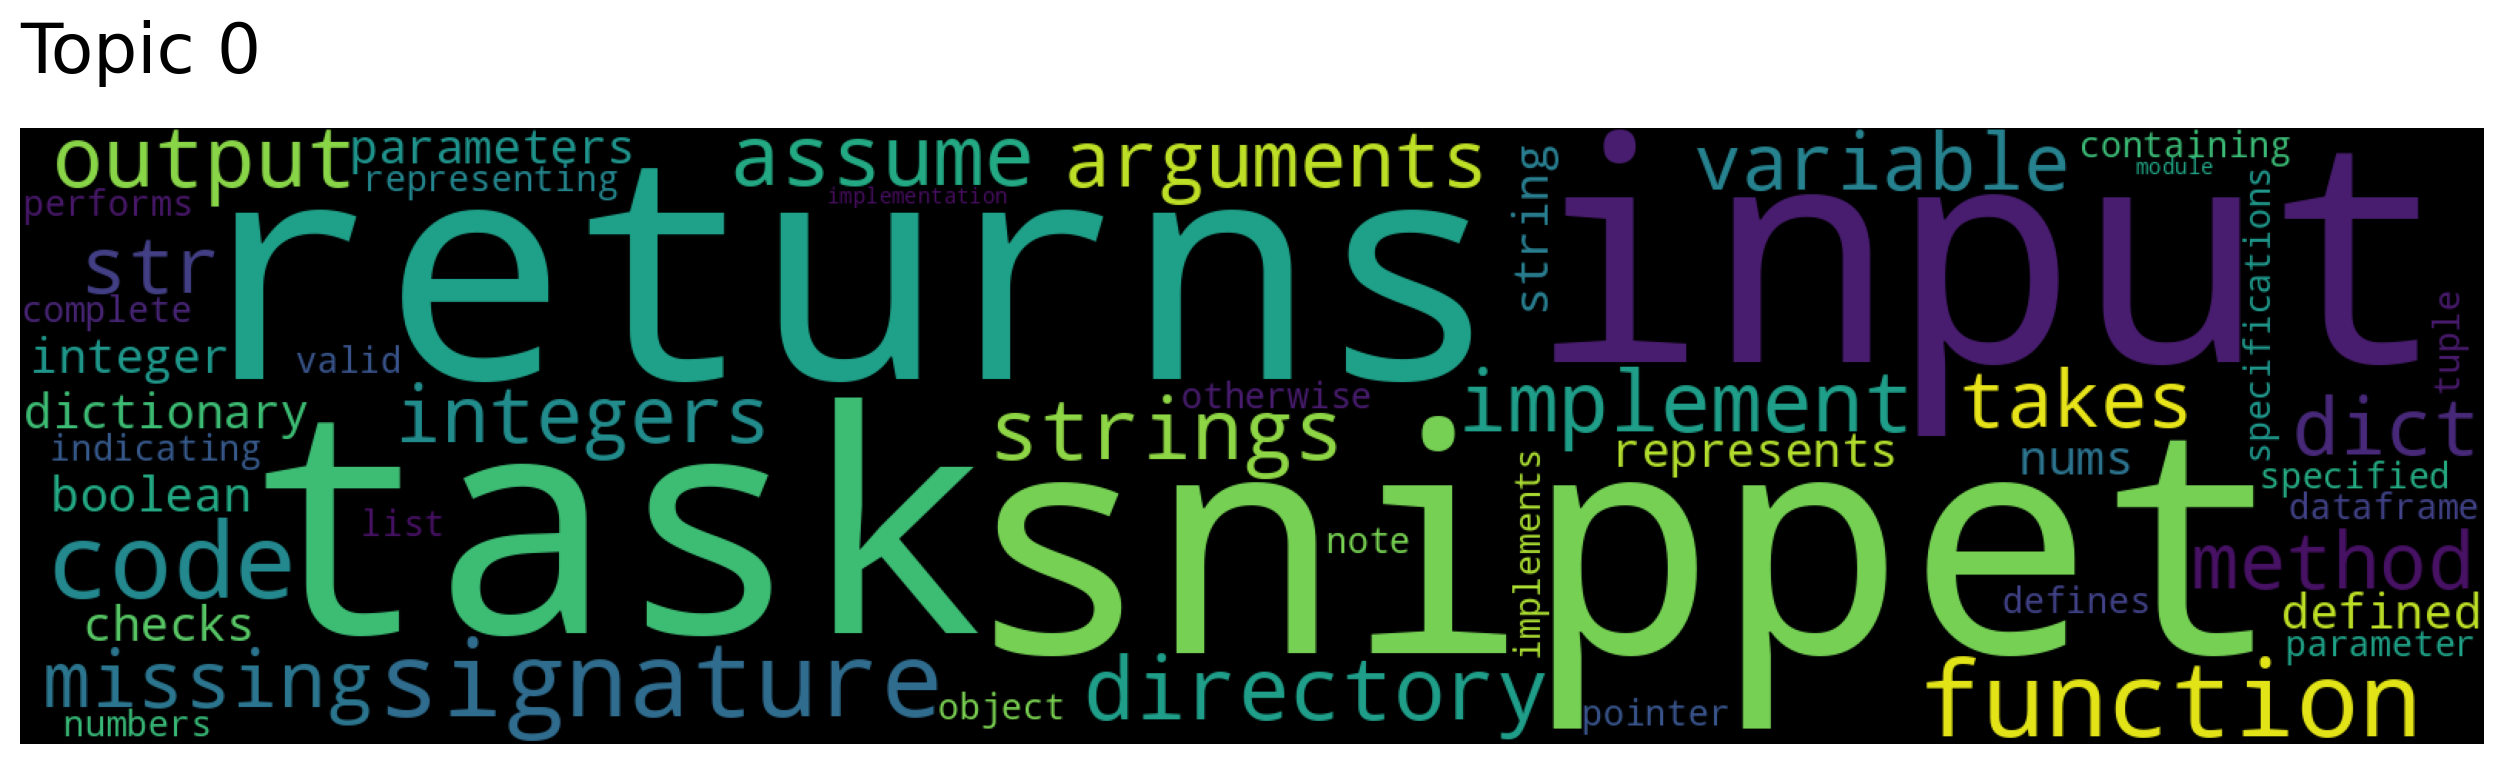

In [15]:
model.generate_topic_wordcloud(0)

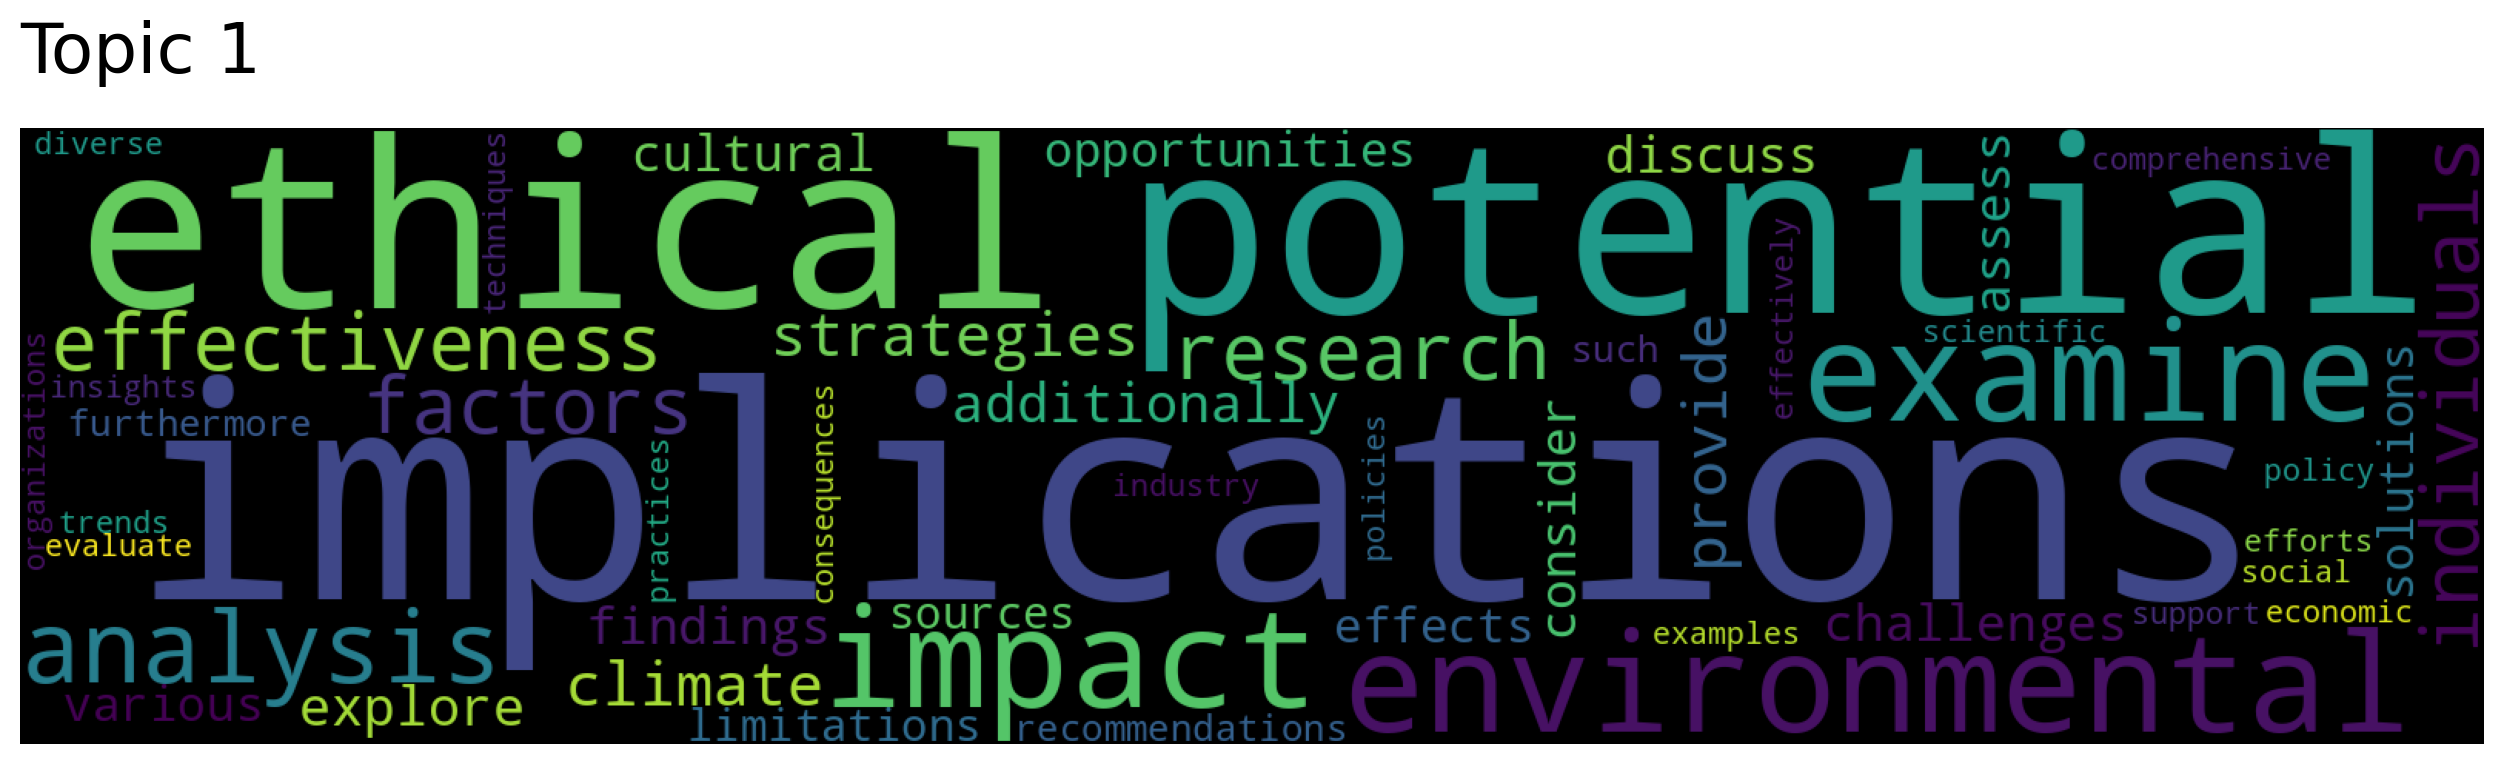

In [16]:
model.generate_topic_wordcloud(1)

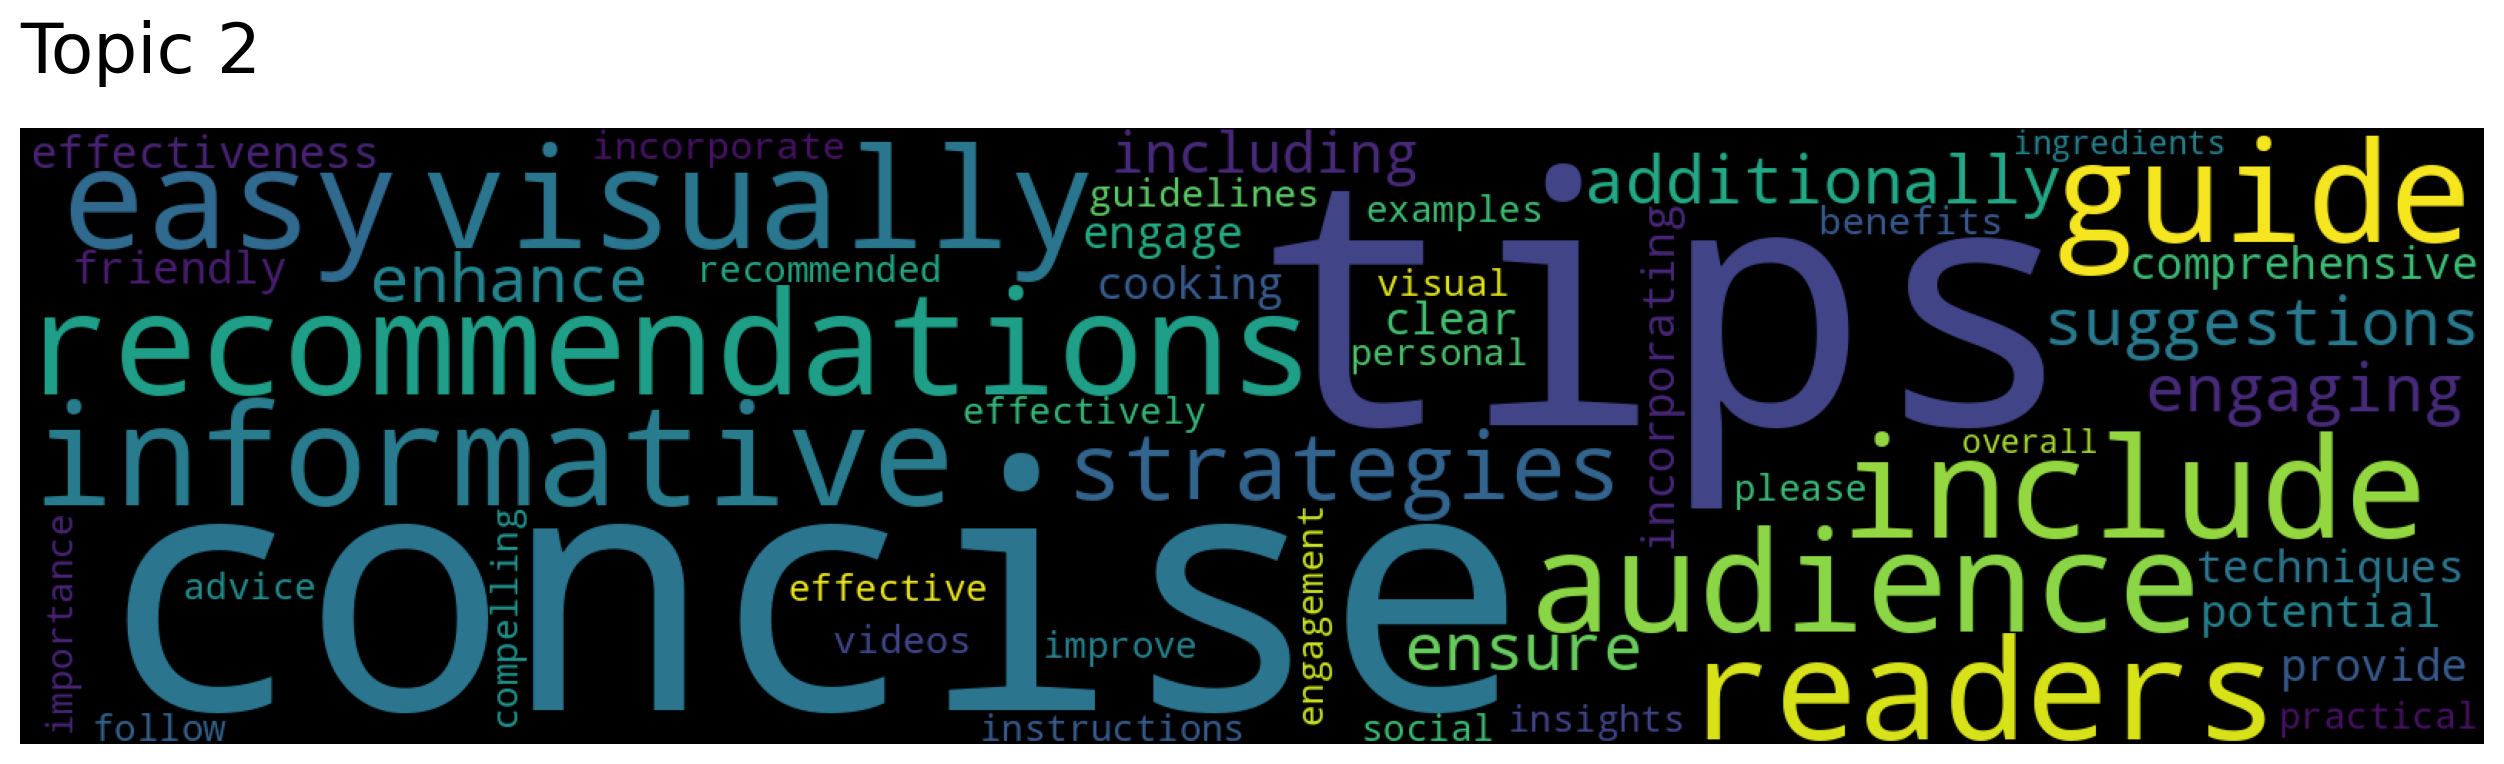

In [18]:
model.generate_topic_wordcloud(2)

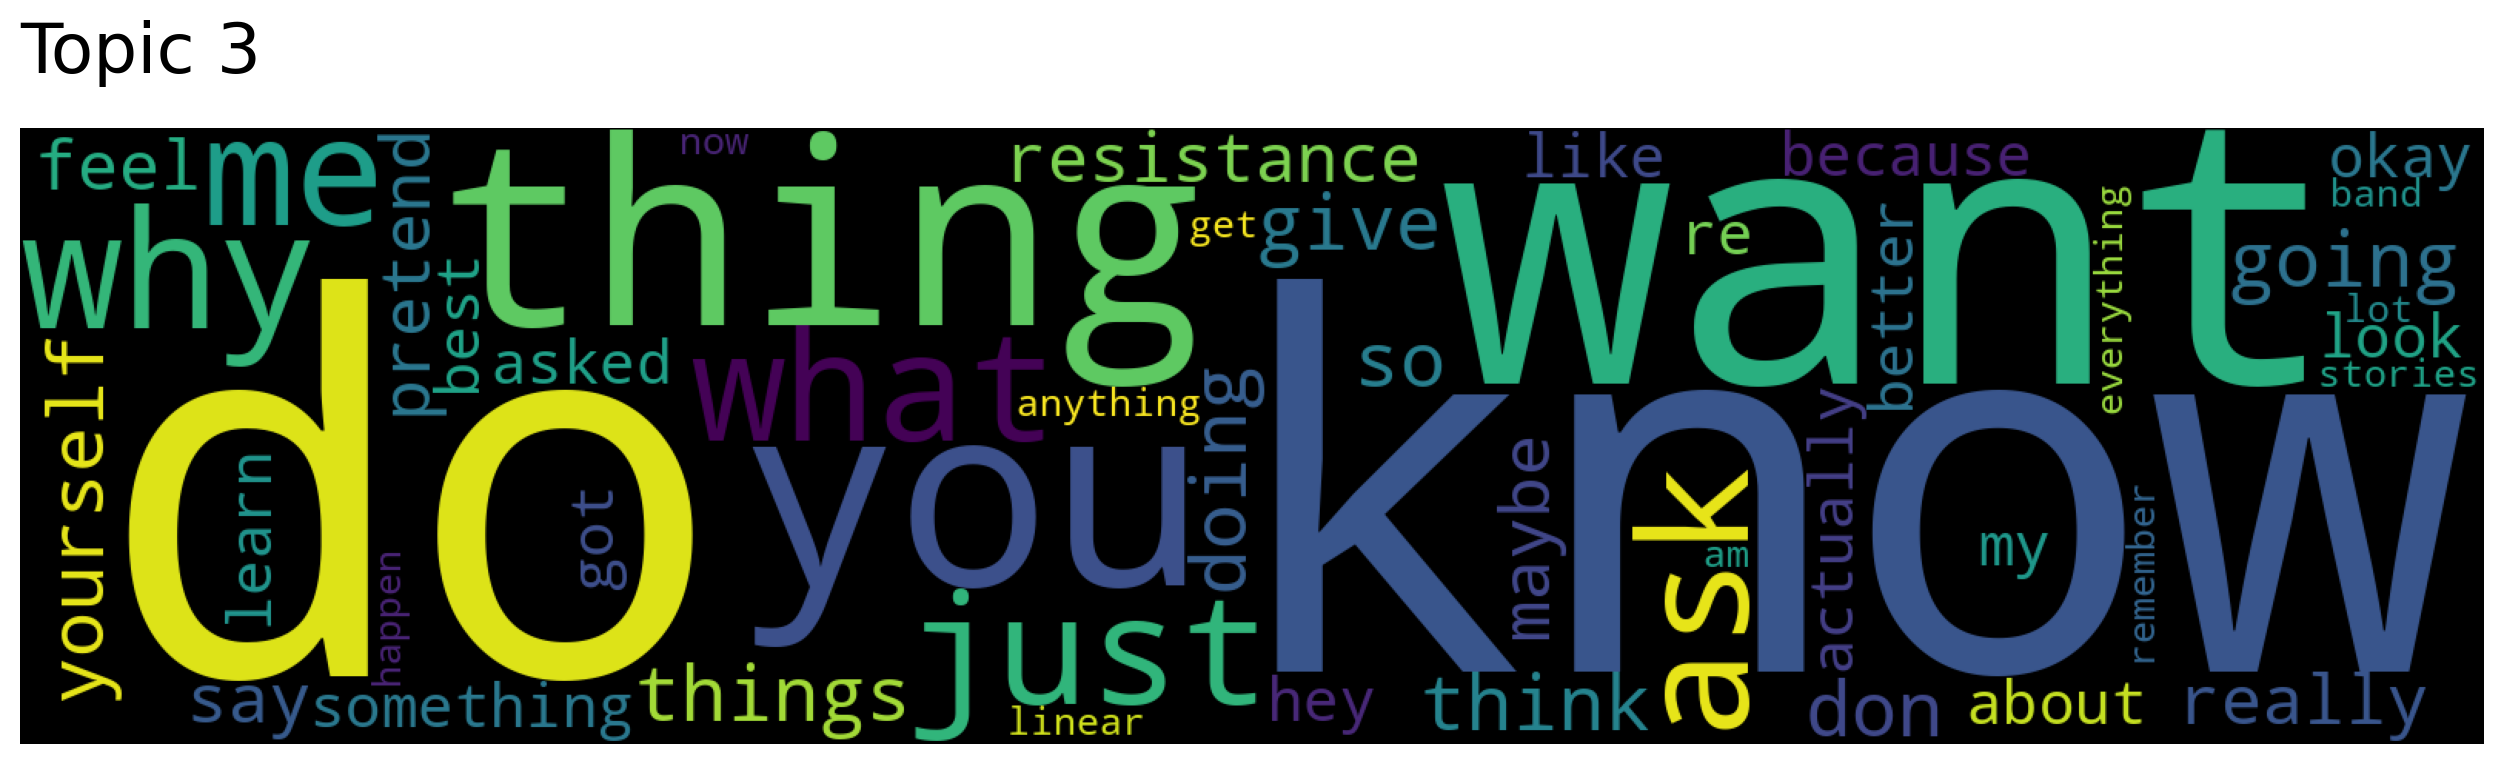

In [19]:
model.generate_topic_wordcloud(3)

Look at documents aligning with a topic

In [20]:
model.search_documents_by_topic(topic_num=0, num_docs=5)

(array(['You are given a code snippet that contains a function called `verify` which is used to check the signature on some data. This function takes two parameters: `signature` and `user`. The `signature` parameter represents the signature on the data, while the `user` parameter represents the user who created the signature.\n\nYour task is to write the implementation of the `verify` function, given the provided code snippet. The `verify` function should check the signature on the data and return a list of fingerprints of signing keys and the unsigned data. \n\nTo accomplish this, you need to complete the implementation of the `verify` function by utilizing the `signature` and `user` parameters, as well as using the `BytesIO` class from the `io` module. Inside the function, you should create a `BytesIO` object called `bio_in` and initialize it with the `signature` parameter.\n\nYou should then implement the logic to check the signature on the data and obtain the fingerprints of the si

Using the wordclouds, model.search_documents_by_topic, model.topic_words

**Give a 2-4 word summary for each of the the top four topics** ⭕

Your answers here: 🙂

*   Topic 0:output, task, snippet
*   Topic 1:impact, ethical, potential
*   Topic 2:audience, recommendations, readers
*   Topic 3:thing, resistance